In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define membership functions
def trapMem(x, params):
    mem = []
    a,b,c,d = np.r_[params]
    for val in x:
        if (a != b):
            term1 = (val - a) / (b - a)
        else:
            term1 = 1
        if (c != d):
            term2 = (d - val) / (d - c)
        else: 
            term2 = 1
        if (a - 0.00001 <= val <= d + 0.00001):
            value = max(min(term1, term2, 1), 0)
        else:
            value = 0
        mem.append(value)
        # print(val, value)
    return mem

def gaussMem(x, params):
    mem = []
    sigma, c = np.r_[params]
    for val in x:
        term1 = -1 * ((val - c) ** 2)
        term2 = 2 * (sigma ** 2)
        value = np.e ** (term1 / term2)
        mem.append(value)
        # print(val, value)
    return mem

def trigMem(x, params):
    mem = []
    a,b,c = np.r_[params]
    for val in x:
        if (a != b):
            term1 = (val - a) / (b - a)
        else:
            term1 = 1
        if (b != c):
            term2 = (c - val) / (c - b)
        else:
            term2 = 1
        if(val < a - 0.00001 or val > c + 0.00001):
            value = 0
        else:
            value = max(min(term1,term2), 0)
        mem.append(value)
        # print(val, value)
    return mem

def centroidDF(x, mf):
    sum = np.sum(mf)
    mfSum = np.sum(np.multiply(mf, x))
    return mfSum / sum

def imp_zadeh(x,y):
    return np.fmin( 1.0 , 1.0 - x + y )

def imp_cor_min(x,y):
    return np.fmin( x, y )

def imp_cor_prod(x,y):
    return np.multiply(x, y)

def implication(x,y,type):
    if (type == 0):
        return np.fmin(1.0, 1.0 - x + y)
    elif (type == 1):
        return np.fmin(x, y)
    elif (type == 2):
        return np.multiply(x, y)

# interpret membership
def interpMem(values, memFunc, x):
    lIndex = None
    for i in range(len(values)):
        if values[i] > x:
            lIndex = i - 1
            break
    
    if lIndex is None: #if the index is at the end of the array
        lIndex = len(values) - 2 # set to the second to last index 

    left = memFunc[lIndex]
    right = memFunc[lIndex + 1]

    leftWeight = (values[lIndex + 1] - x) / (values[lIndex + 1] - values[lIndex])
    rightWeight = 1 - leftWeight

    return (leftWeight * left) + (rightWeight * right)
    
def aggregate(rules, type):
    if (type == 0):
        return np.fmax.reduce(rules)
    if (type == 1):
        return sum(rules)

In [3]:
# interpret membership

def interpMem(values, memFunc, x):
    left = memFunc[int(np.floor(x))]
    right = memFunc[int(np.ceil(x))]
    print(left)
    print(right)
    term1 = (right - left) * (x - np.floor(x))
    print(term1)
    return term1 + left
    


[ 0  1  2  3  4  5  6  7  8  9 10]


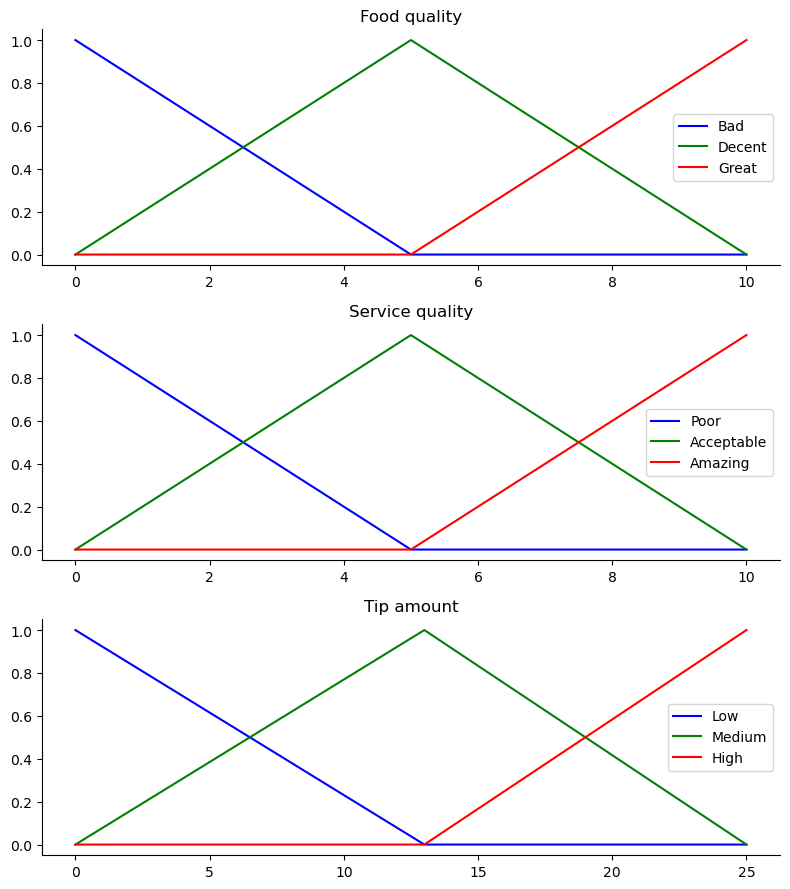

In [4]:
# sample values
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip = np.arange(0, 26, 1)
print(x_qual)

# fuzzy membership functions
qual_lo = trigMem(x_qual, [0, 0, 5])
qual_md = trigMem(x_qual, [0, 5, 10])
qual_hi = trigMem(x_qual, [5, 10, 10])
serv_lo = trigMem(x_serv, [0, 0, 5])
serv_md = trigMem(x_serv, [0, 5, 10])
serv_hi = trigMem(x_serv, [5, 10, 10])
tip_lo = trigMem(x_tip, [0, 0, 13])
tip_md = trigMem(x_tip, [0, 13, 25])
tip_hi = trigMem(x_tip, [13, 25, 25])

# visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


0
0
0.0
0.8
0.6
-0.10000000000000003
0.2
0.4
0.1
Food quality membership values
Bad:  0.0
Decent:  0.7
Great:  0.30000000000000004


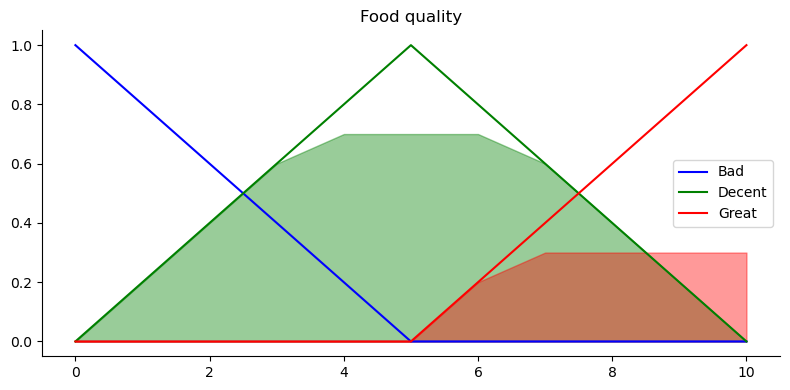

In [5]:
qual_level_lo = interpMem(x_qual, qual_lo, 6.5)
qual_level_md = interpMem(x_qual, qual_md, 6.5)
qual_level_hi = interpMem(x_qual, qual_hi, 6.5)

print('Food quality membership values')
print('Bad: ',qual_level_lo)
print('Decent: ',qual_level_md)
print('Great: ',qual_level_hi)

# visualize these universes and membership functions
fig, ax0 = plt.subplots(nrows=1, figsize=(8, 4))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
qual_lo_degree = np.minimum(qual_lo,qual_level_lo)
ax0.fill_between(x_qual,qual_lo_degree,color="blue",alpha=0.4)

ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
qual_md_degree = np.minimum(qual_md,qual_level_md)
ax0.fill_between(x_qual,qual_md_degree,color="green",alpha=0.4)

ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
qual_hi_degree = np.minimum(qual_hi,qual_level_hi)
ax0.fill_between(x_qual,qual_hi_degree,color="red",alpha=0.4)

ax0.set_title('Food quality')
ax0.legend()

# turn off top/right axes
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

0
0
0.0
0.2
0.0
-0.16000000000000014
0.8
1.0
0.16000000000000011
Service membership values
Bad:  0.0
Decent:  0.03999999999999987
Great:  0.9600000000000002


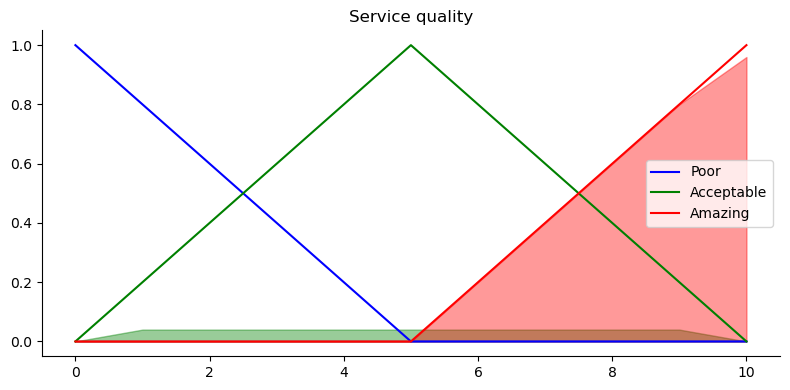

In [6]:
serv_level_lo = interpMem(x_serv, serv_lo, 9.8)
serv_level_md = interpMem(x_serv, serv_md, 9.8)
serv_level_hi = interpMem(x_serv, serv_hi, 9.8)

print('Service membership values')
print('Bad: ',serv_level_lo)
print('Decent: ',serv_level_md)
print('Great: ',serv_level_hi)

# visualize these universes and membership functions
fig, ax1 = plt.subplots(nrows=1, figsize=(8, 4))

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
serv_lo_degree = np.minimum(serv_lo, serv_level_lo)
ax1.fill_between(x_serv, serv_lo_degree,color="blue",alpha=0.4)

ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
serv_md_degree = np.minimum(serv_md, serv_level_md)
ax1.fill_between(x_serv, serv_md_degree,color="green",alpha=0.4)

ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
serv_hi_degree = np.minimum(serv_hi, serv_level_hi)
ax1.fill_between(x_serv, serv_hi_degree,color="red",alpha=0.4)

ax1.set_title('Service quality')
ax1.legend()

# turn off top/right axes
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

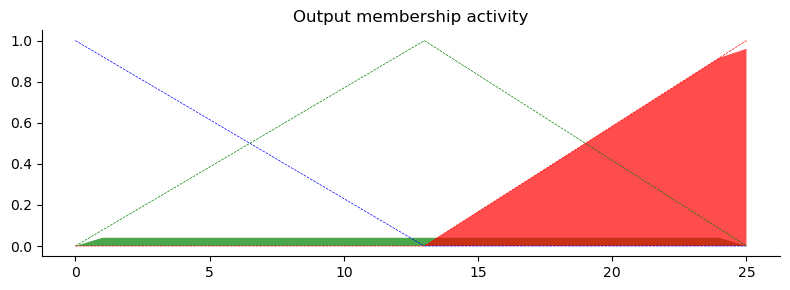

In [7]:
# now we take our rules and apply them. 
# rule 1 concerns bad food OR service.
# the OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

# now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0

# for rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md)

# for rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

# visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

(26,)
(26,)
6.979999999999999
141.30666666666667
20.244508118433625
0.5833333333333334
0.6666666666666666
0.020375676536135423


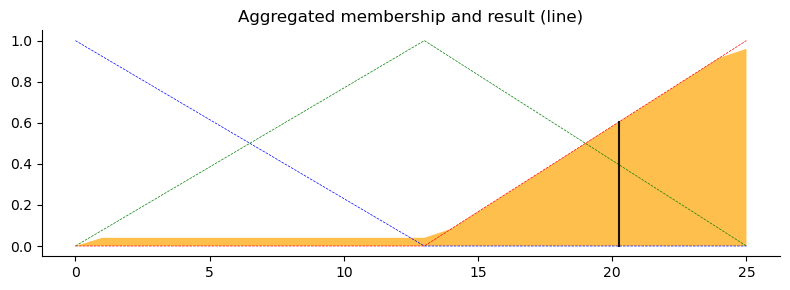

In [8]:
# aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

print(aggregated.shape)
print(x_tip.shape)

# calculate defuzzified result
tip = centroidDF(x_tip, aggregated)
tip_activation = interpMem(x_tip, aggregated, tip)  # for plot

# visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()